
## Data cleaning

In [6]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
img=cv2.imread("./test_image/sharapova1.jpg")
img.shape


(555, 700, 3)

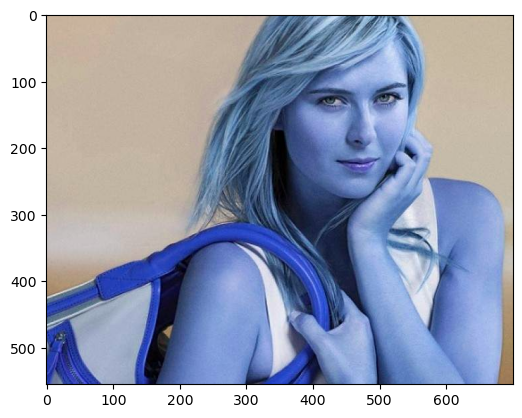

In [8]:
plt.imshow(img)

In [9]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

In [10]:
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

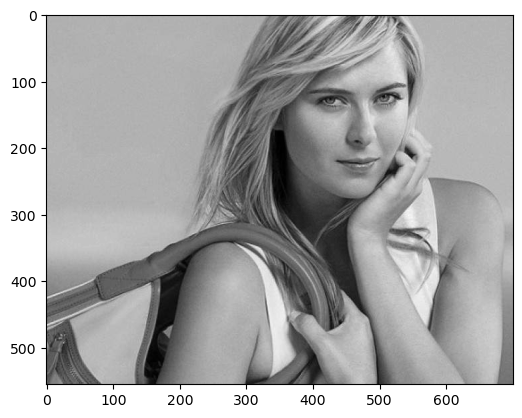

In [11]:
plt.imshow(gray, cmap="gray")

In [12]:
face_cascade=cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')

faces=face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
faces

array([[352,  38, 233, 233]])

In [13]:
(x,y,w,h)=faces[0]
x,y,w,h

(352, 38, 233, 233)

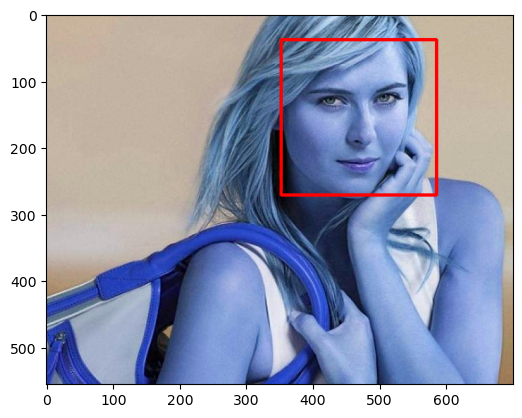

In [14]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
plt.imshow(face_img)

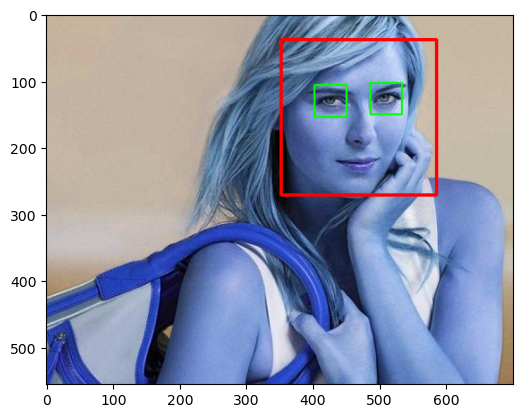

In [15]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

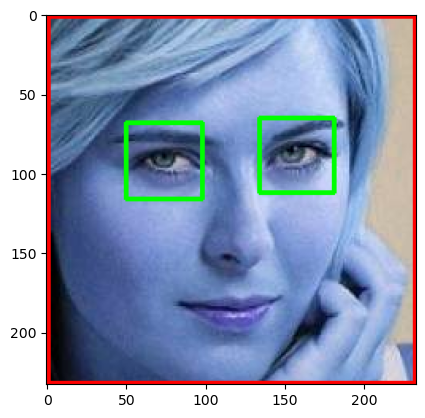

In [16]:
plt.imshow(roi_color, cmap='gray')
plt.show()

In [17]:
 def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                            return roi_color

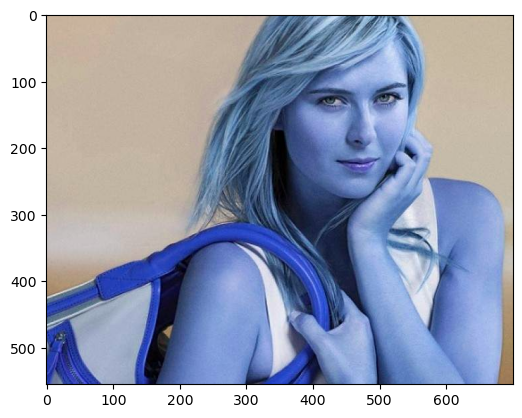

In [83]:
original_image = cv2.imread('./test_image/sharapova1.jpg')
plt.imshow(original_image)


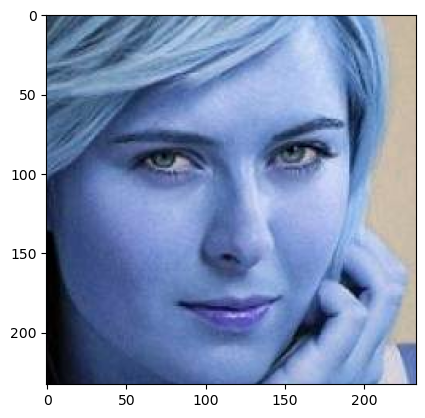

In [88]:
cropped_image = get_cropped_image_if_2_eyes('./test_image/sharapova1.jpg')
plt.imshow(cropped_image)

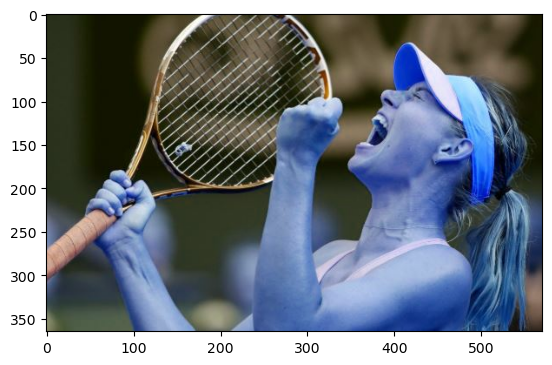

In [18]:
org_image_obstructed = cv2.imread('./test_image/sharapova2.jpg')
plt.imshow(org_image_obstructed)

In [19]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_image/sharapova2.jpg')
cropped_image_no_2_eyes

In [21]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [22]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./dataset/cristiano',
 './dataset/cropped',
 './dataset/donald_trump',
 './dataset/leonel_messi',
 './dataset/taylor_swift',
 './dataset/virat_kohli']

In [23]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [25]:

cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

cristiano
cropped
donald_trump
Generating cropped images in folder:  ./dataset/cropped/donald_trump
leonel_messi
Generating cropped images in folder:  ./dataset/cropped/leonel_messi
taylor_swift
Generating cropped images in folder:  ./dataset/cropped/taylor_swift
virat_kohli
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


## Preprocessing: Use wavelet transform as a feature for traning our model

In [26]:
cropped_img = np.array(roi_color)
cropped_img.shape

()

In [36]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [37]:

im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src data type = object is not supported
>  - Expected Ptr<cv::UMat> for argument 'src'
